In [1]:
import pandas as pd
df=pd.read_csv('./원핫인코딩.csv')
df

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,619,2853.325952,39946.563333,101348.880,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,608,2044.094146,41903.930000,112542.580,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502,3801.447619,17740.088889,37977.190,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,699,3072.812564,59919.845000,46913.315,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,850,2918.856279,41836.940000,79084.100,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,3072.812564,19973.281667,48135.320,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,516,1639.131714,5215.419091,101699.770,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,709,3328.880278,14979.961250,42085.580,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772,1787.507381,18768.827500,46444.260,0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 표준화

In [2]:
df = df.astype({'credit_score':'float',
                                'active_member':'float',
                                'churn':'float'})

In [3]:
df.dtypes

credit_score                         float64
balance_per_age                      float64
balance_per_tenure                   float64
salary_per_products                  float64
active_member                        float64
churn                                float64
country_France                       float64
country_Germany                      float64
country_Spain                        float64
age_group_gender_eighties_Female     float64
age_group_gender_eighties_Male       float64
age_group_gender_fifties_Female      float64
age_group_gender_fifties_Male        float64
age_group_gender_forties_Female      float64
age_group_gender_forties_Male        float64
age_group_gender_nineties_Male       float64
age_group_gender_seventies_Female    float64
age_group_gender_seventies_Male      float64
age_group_gender_sixties_Female      float64
age_group_gender_sixties_Male        float64
age_group_gender_teenager_Female     float64
age_group_gender_teenager_Male       float64
age_group_

In [4]:
df.columns

Index(['credit_score', 'balance_per_age', 'balance_per_tenure',
       'salary_per_products', 'active_member', 'churn', 'country_France',
       'country_Germany', 'country_Spain', 'age_group_gender_eighties_Female',
       'age_group_gender_eighties_Male', 'age_group_gender_fifties_Female',
       'age_group_gender_fifties_Male', 'age_group_gender_forties_Female',
       'age_group_gender_forties_Male', 'age_group_gender_nineties_Male',
       'age_group_gender_seventies_Female', 'age_group_gender_seventies_Male',
       'age_group_gender_sixties_Female', 'age_group_gender_sixties_Male',
       'age_group_gender_teenager_Female', 'age_group_gender_teenager_Male',
       'age_group_gender_thirties_Female', 'age_group_gender_thirties_Male',
       'age_group_gender_twenties_Female', 'age_group_gender_twenties_Male'],
      dtype='object')

In [5]:
df[['credit_score', 'balance_per_age', 'balance_per_tenure',
       'salary_per_products']]

,credit_score,balance_per_age,balance_per_tenure,salary_per_products
0,619.0,2853.325952,39946.563333,101348.880
1,608.0,2044.094146,41903.930000,112542.580
2,502.0,3801.447619,17740.088889,37977.190
3,699.0,3072.812564,59919.845000,46913.315
4,850.0,2918.856279,41836.940000,79084.100
...,...,...,...,...
9995,771.0,3072.812564,19973.281667,48135.320
9996,516.0,1639.131714,5215.419091,101699.770
9997,709.0,3328.880278,14979.961250,42085.580
9998,772.0,1787.507381,18768.827500,46444.260


In [6]:
x1 = df[['credit_score', 'balance_per_age', 'balance_per_tenure',
       'salary_per_products']]

In [7]:
from sklearn.preprocessing import StandardScaler

# 데이터프레임에서 수치형 열만 선택
# numeric_features = df.select_dtypes(include=[float, int])

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
scaled_features = scaler.fit_transform(x1)

# 표준화된 데이터프레임 생성
df_standard = pd.DataFrame(scaled_features, columns=x1.columns)

df_standard

,credit_score,balance_per_age,balance_per_tenure,salary_per_products
0,-0.326221,-0.402237,0.439067,0.511633
1,-0.440036,-1.141788,0.517514,0.726664
2,-1.536794,0.464244,-0.450913,-0.705735
3,0.501521,-0.201650,1.239547,-0.534073
4,2.063884,-0.342349,0.514829,0.083927
...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598
9996,-1.391939,-1.511880,-0.952871,0.518374
9997,0.604988,0.032368,-0.561532,-0.626813
9998,1.256835,-1.376280,-0.409684,-0.543083


In [8]:
csv_filename = '표준화.csv'
df_standard.to_csv(csv_filename, index=False)

In [9]:
for col in df_standard.columns:
    mean_value = df_standard[col].mean()
    std_value = df_standard[col].std()
    # if mean_value < 0:
    #     mean_value_rever = -mean_value
    print('%.5f %10.5f' %(mean_value, std_value))
    # 소수점 오차나 계산 방법에 따라 표준편차가 정확히 1이 아닌 경우가 있다

-0.00000    1.00005
-0.00000    1.00005
0.00000    1.00005
0.00000    1.00005


# 정규화

In [10]:
from sklearn.preprocessing import MinMaxScaler

# 데이터프레임에서 수치형 열만 선택
# numeric_features = df.select_dtypes(include=[float, int])

# StandardScaler 객체 생성
scaler = MinMaxScaler()

# 데이터 표준화
scaled_features = scaler.fit_transform(x1)

# 표준화된 데이터프레임 생성
df_normal = pd.DataFrame(scaled_features, columns=x1.columns)

df_normal

,credit_score,balance_per_age,balance_per_tenure,salary_per_products
0,0.538,0.272722,0.196267,0.506790
1,0.516,0.192734,0.206282,0.562770
2,0.304,0.366438,0.082654,0.189867
3,0.698,0.294417,0.298455,0.234557
4,1.000,0.279199,0.205939,0.395443
...,...,...,...,...
9995,0.842,0.294417,0.094080,0.240668
9996,0.332,0.152706,0.018575,0.508545
9997,0.718,0.319728,0.068533,0.210413
9998,0.844,0.167372,0.087917,0.232211


In [11]:
# print('col_min    col_max')
for col in df_normal.columns:
    # print(f'{df_normalized[col].min()}   {df_normalized[col].max()}')
    print('%.3f %10.3f' % (df_normal[col].min(),df_normal[col].max()))

0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000


In [12]:
csv_filename = '정규화.csv'
df_normal.to_csv(csv_filename, index=False)

In [13]:
# 원핫인코딩된 것들은 표준화와 정규화에서 제외

# pca 주성분 개수 찾기

In [14]:
# 표준화 된 변수랑 원본 합치기
df2 = pd.concat([df_standard,df[['active_member', 'churn', 'country_France',
       'country_Germany', 'country_Spain', 'age_group_gender_eighties_Female',
       'age_group_gender_eighties_Male', 'age_group_gender_fifties_Female',
       'age_group_gender_fifties_Male', 'age_group_gender_forties_Female',
       'age_group_gender_forties_Male', 'age_group_gender_nineties_Male',
       'age_group_gender_seventies_Female', 'age_group_gender_seventies_Male',
       'age_group_gender_sixties_Female', 'age_group_gender_sixties_Male',
       'age_group_gender_teenager_Female', 'age_group_gender_teenager_Male',
       'age_group_gender_thirties_Female', 'age_group_gender_thirties_Male',
       'age_group_gender_twenties_Female', 'age_group_gender_twenties_Male']]],axis=1)

In [15]:
df2

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,-0.326221,-0.402237,0.439067,0.511633,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.440036,-1.141788,0.517514,0.726664,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.536794,0.464244,-0.450913,-0.705735,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.501521,-0.201650,1.239547,-0.534073,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.063884,-0.342349,0.514829,0.083927,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,-1.391939,-1.511880,-0.952871,0.518374,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.604988,0.032368,-0.561532,-0.626813,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,1.256835,-1.376280,-0.409684,-0.543083,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
csv_filename = '표준화완성본.csv'
df2.to_csv(csv_filename, index=False)

In [17]:
x2 = df2[df2.columns.difference(['churn'])]

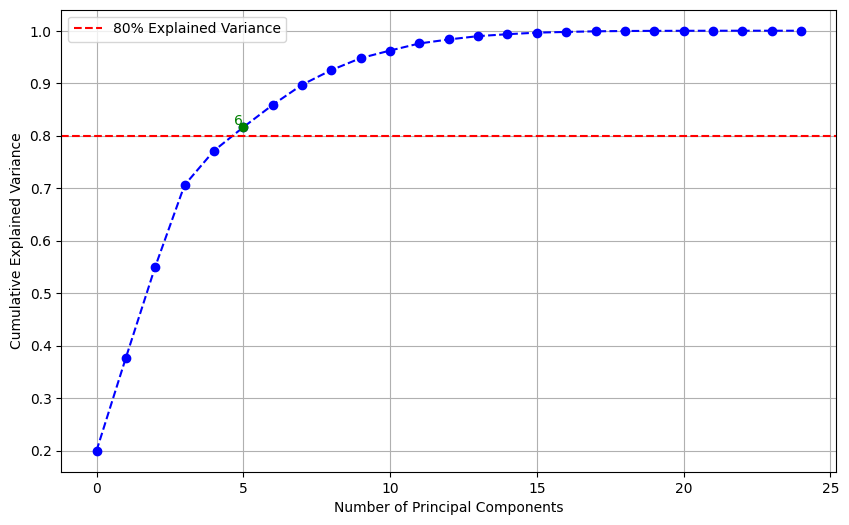

설명된 분산이 80%를 넘는 주성분 개수: 6


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA 모델 적합
pca = PCA()
pca.fit(x2)  # x2는 데이터셋

# 설명된 분산 비율 누적 계산
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# 설명된 분산이 80% 이상인 주성분 개수 찾기
n_components = np.argmax(explained_variance >= 0.80) + 1

# 플롯 생성
plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.legend()
plt.grid(True)

# 80%를 넘는 지점을 표시
plt.scatter(n_components - 1, explained_variance[n_components - 1], color='g', zorder=5)
plt.text(n_components - 1, explained_variance[n_components - 1], f'{n_components}', 
         verticalalignment='bottom', horizontalalignment='right', color='g')

plt.show()

print(f"설명된 분산이 80%를 넘는 주성분 개수: {n_components}")

In [19]:
import pandas as pd
from sklearn.decomposition import PCA

n=6
li=[]
for i in range(1,n+1):
    prin=f'principal {i}'
    li.append(prin)

# 2. PCA 적용
pca = PCA(n_components=n)  # 주성분의 개수 설정
principal_components = pca.fit_transform(x2)

# 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=li)

In [20]:
pca_df

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6
0,-0.081152,0.714698,0.111165,0.511516,0.620504,0.250174
1,-0.612193,1.034555,0.228446,0.993473,-0.566902,0.786106
2,-0.001868,0.225956,-1.739145,-0.414447,0.543115,-0.440954
3,0.708717,-0.490695,0.242860,1.120250,0.624937,-0.463350
4,0.058692,-0.990903,1.844525,0.639159,-0.581803,0.739728
...,...,...,...,...,...,...
9995,-0.300257,-1.169865,0.694020,-0.093036,0.626421,-0.238671
9996,-1.760475,1.175212,-0.819321,0.081631,0.675815,0.500717
9997,-0.287707,-0.960169,0.081031,-0.292959,0.620921,0.218612
9998,-1.328276,-1.046260,0.837419,0.730312,-0.581993,-0.908688


In [21]:
pca.explained_variance_ratio_.cumsum()

array([0.19967529, 0.37673071, 0.55023557, 0.70588981, 0.77126845,
       0.81608634])

In [22]:
# 주성분 개수는 6개

# 주성분 벡터 데이터프레임

In [23]:
# 주성분 벡터를 데이터프레임으로 변환
components_df = pd.DataFrame(
    pca.components_, 
    columns=df2.columns.difference(['churn']),  # 종속 변수 제외한 열 이름
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
components_df

,active_member,age_group_gender_eighties_Female,age_group_gender_eighties_Male,age_group_gender_fifties_Female,age_group_gender_fifties_Male,age_group_gender_forties_Female,age_group_gender_forties_Male,age_group_gender_nineties_Male,age_group_gender_seventies_Female,age_group_gender_seventies_Male,...,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male,balance_per_age,balance_per_tenure,country_France,country_Germany,country_Spain,credit_score,salary_per_products
PC1,-0.011589,-0.000706,-0.000984,-0.026889,-0.031248,-0.046404,-0.049546,-0.000152,-0.007158,-0.006814,...,0.032445,0.059421,0.076437,0.749816,0.646601,0.018443,-0.016482,-0.001961,0.024385,-0.018875
PC2,-0.016353,0.000043,-0.000115,0.006052,0.008087,0.018589,0.015378,0.000059,-0.000701,0.000580,...,-0.015744,-0.013147,-0.012926,-0.097331,0.165038,-0.005511,0.012380,-0.006869,-0.573518,0.795292
PC3,0.009873,0.000319,0.000141,0.002720,0.005102,0.014548,0.007845,0.000250,0.001344,0.001849,...,-0.011219,-0.013062,-0.011657,-0.094659,0.101412,-0.013501,0.014143,-0.000642,0.818553,0.556318
PC4,0.036028,0.000652,0.000606,0.032135,0.029032,0.050884,0.052774,0.000331,0.007932,0.007498,...,-0.038931,-0.068402,-0.084849,-0.613520,0.736861,-0.019955,0.018916,0.001039,-0.006018,-0.238362
PC5,0.016545,0.001093,-0.000372,-0.009457,-0.001557,-0.014428,-0.004935,0.000374,0.002096,0.000115,...,0.017567,-0.002523,-0.005829,-0.037382,0.006533,0.815340,-0.413927,-0.401413,0.008576,0.010069
PC6,0.677919,0.000473,0.000704,-0.004009,0.003222,-0.072481,-0.043771,0.000247,0.005443,0.007000,...,0.154866,-0.003127,-0.005179,-0.004041,-0.004593,-0.017211,-0.492705,0.509916,-0.011415,0.022683


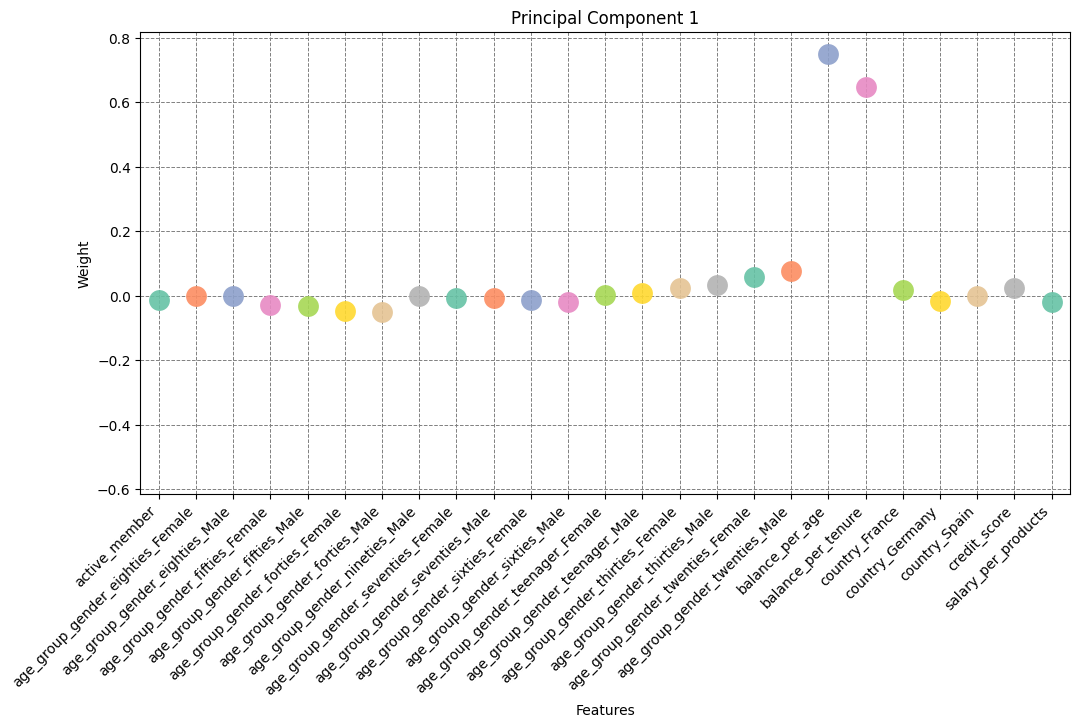

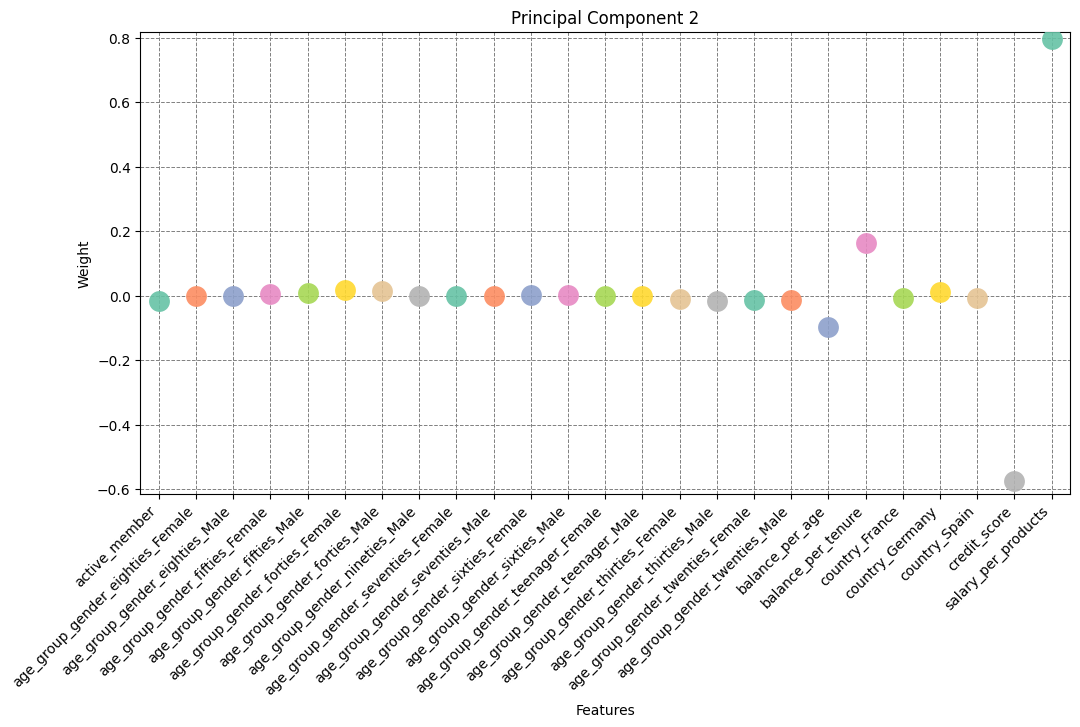

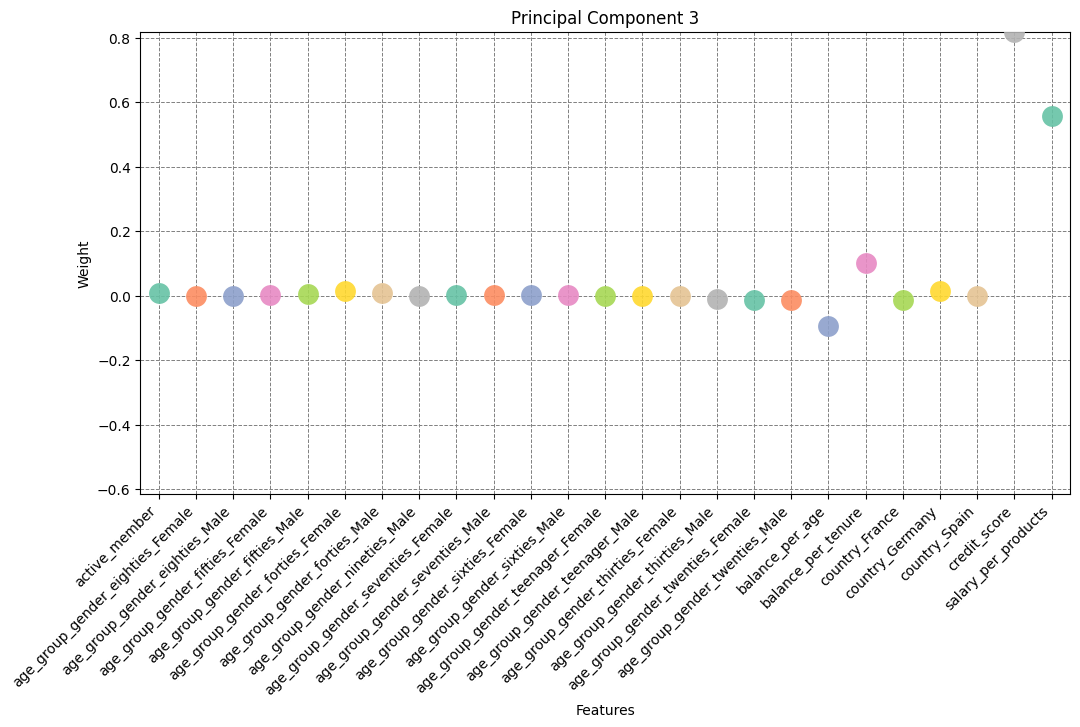

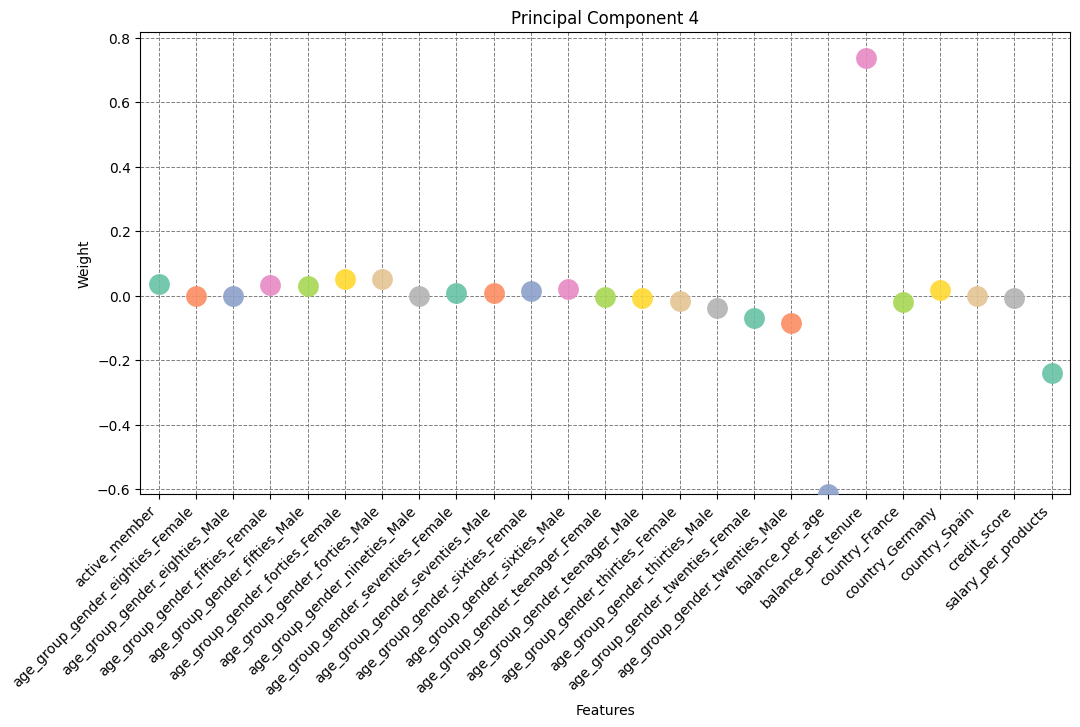

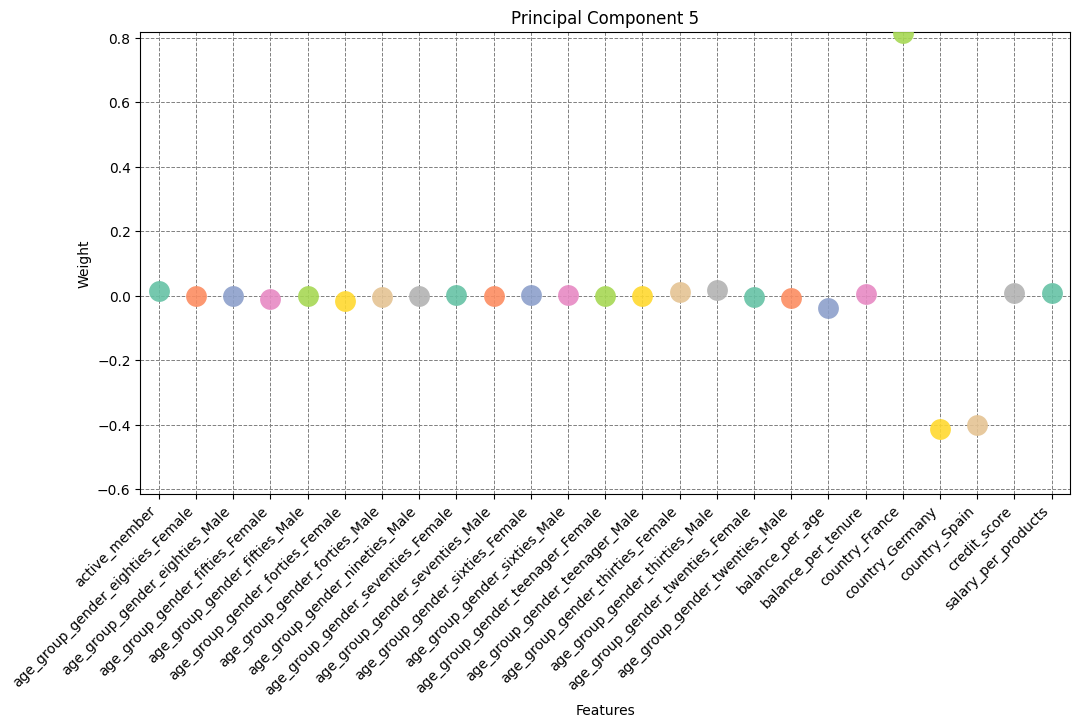

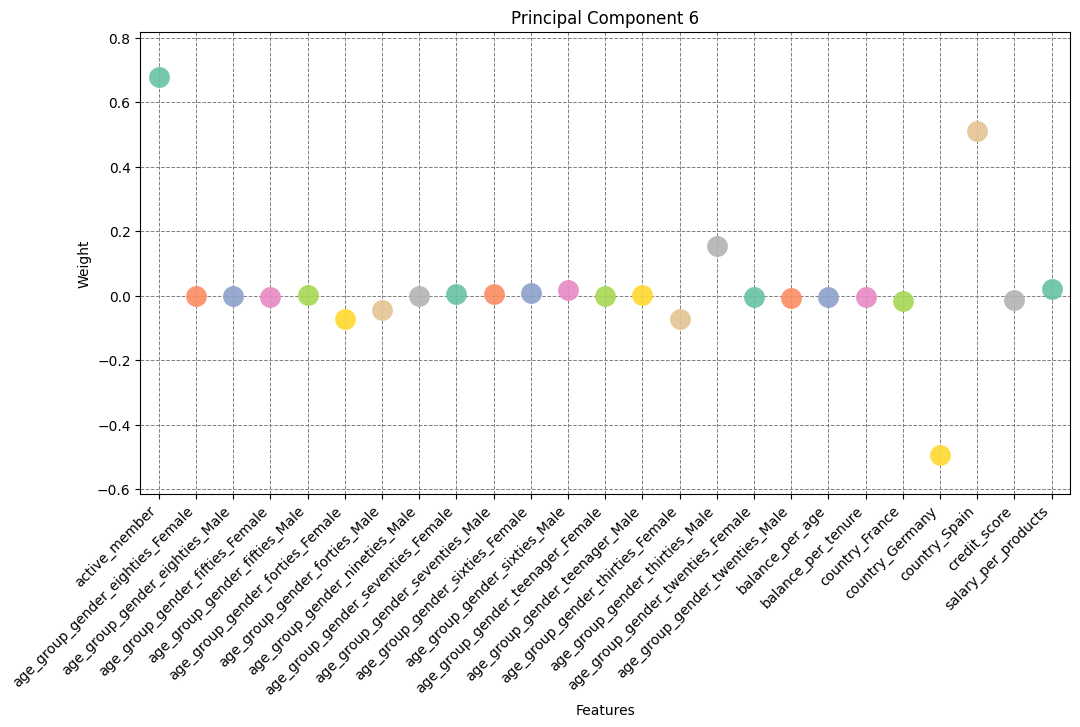

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# 데이터프레임의 길이를 맞추기 위해 Melt
melted_df = components_df.reset_index().melt(id_vars='index', var_name='Feature', value_name='Weight')
melted_df.rename(columns={'index': 'Principal Component'}, inplace=True)

# Y축 범위를 동일하게 설정하기 위해 모든 주성분의 Weight의 범위를 찾기
min_weight = melted_df['Weight'].min()
max_weight = melted_df['Weight'].max()

# 각 주성분별로 바이올린 플롯을 개별적으로 생성
for i in range(6):
    plt.figure(figsize=(12, 6))
    # 점으로 데이터 표시
    sns.stripplot(x='Feature', y='Weight', hue='Feature', data=melted_df[melted_df['Principal Component'] == f'PC{i+1}'],   
              dodge=False, # 점들이 중심에 맞추어 배치되도록 합니다. 기본값은 True로, 이 경우 각 범주에 대해 점이 약간 이동합니다.
              palette='Set2', size=15, alpha=0.9, jitter=True)
    plt.title(f'Principal Component {i+1}')
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')  # 그리드 추가
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')  # x축 레이블을 45도 기울이기
    plt.ylim(min_weight, max_weight)  # y축 범위 설정
    # plt.legend_.remove()  # 범례 제거
    plt.show()

# 벡터는 크기나 방향이 절대적이지 않고 데이터에 따라 상대적이다

# lda

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# 데이터의 특성 차원을 줄이면서도 데이터의 클래스 간 분리를 최대화하려고 합니다
import pandas as pd

# 데이터 로딩
# data = pd.read_csv('dataset.csv')
X = df2.drop('churn', axis=1)  # 'target'은 종속 변수 열 이름
y = df2['churn']  # 종속 변수

# LDA 적용
lda = LDA(n_components=1)  # 차원 축소 개수 설정
# n_classes 종속 변수의 고유한 값의 개수
# churn 0과 1로 이루어진 이진 분류이므로 총 2개의 클래스
# 고로 n_components의 최대값은 n_classes-1이므로 1이 될 수 밖에 없다

X_lda = lda.fit_transform(X, y)
# ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

# 변환된 데이터 확인
print("LDA transformed data shape:", X_lda.shape)

LDA transformed data shape: (10000, 1)


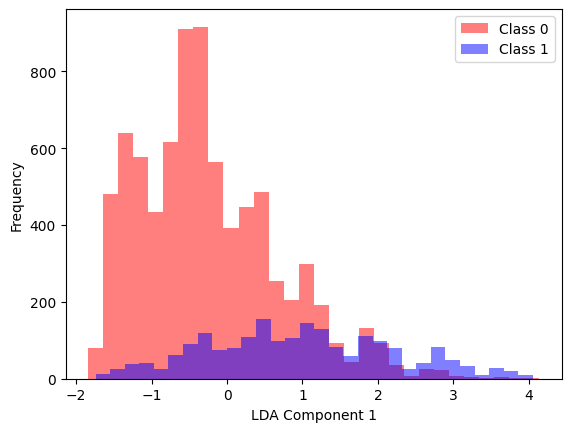

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 예제: LDA 변환 결과 시각화 (히스토그램)
# X_lda의 첫 번째 차원만 사용 (1D 프로젝션)
plt.hist(X_lda[y == 0, 0], color='r', alpha=0.5, bins=30, label='Class 0')
plt.hist(X_lda[y == 1, 0], color='b', alpha=0.5, bins=30, label='Class 1')

plt.xlabel('LDA Component 1')
plt.ylabel('Frequency')
plt.legend()
# plt.title('LDA 1D Projection')
plt.show()

# 클래스 1이 대부분 0에, 클래스 0이 다른 값에 분포
# 클래스 분포의 차이를 효과적으로 포착하고 있다
# 차원 축소는 1차원으로 이루어짐

# get ready for clustering

In [27]:
df2_no_churn = df2.drop(['churn'],axis=1)
df2_no_churn

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,-0.326221,-0.402237,0.439067,0.511633,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.440036,-1.141788,0.517514,0.726664,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.536794,0.464244,-0.450913,-0.705735,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.501521,-0.201650,1.239547,-0.534073,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.063884,-0.342349,0.514829,0.083927,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,-1.391939,-1.511880,-0.952871,0.518374,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.604988,0.032368,-0.561532,-0.626813,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,1.256835,-1.376280,-0.409684,-0.543083,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df2_array = np.array(df2_no_churn)

In [29]:
# LDA, PCA를 하는데 데이터프레임을 배열로 변환해야 하는 이유

# 둘은 sklearn에서 제공하는 알고리즘
# 입력 데이터로 넘파이 배열이나 사이파이 희소 행렬을 요구

# 넘파이 배열을 사용하여 수치 연산을 수행

# 넘파이 배열은 연산 속도가 빠르다
# 데이터프레임이 상대적으로 느리다

In [30]:
df2_array

array([[-0.32622142, -0.40223691,  0.43906723, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44003595, -1.14178755,  0.51751361, ...,  0.        ,
         0.        ,  0.        ],
       [-1.53679418,  0.46424409, -0.45091299, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.60498839,  0.03236848, -0.56153204, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25683526, -1.37628019, -0.40968371, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.46377078,  1.23786222, -0.11873178, ...,  0.        ,
         1.        ,  0.        ]])

In [31]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: churn, Length: 10000, dtype: float64

# 클러스터링 개수 찾기-엘보우 기법

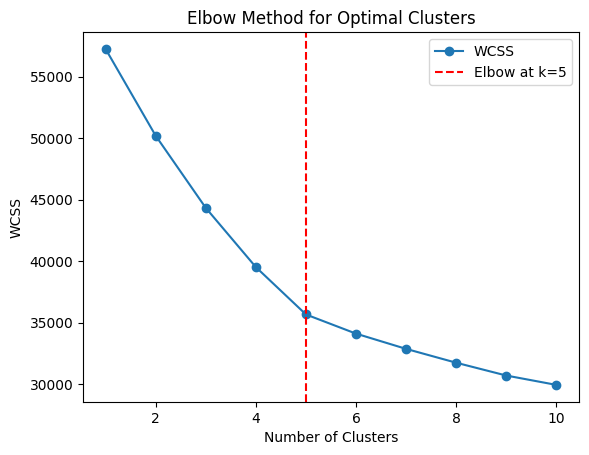

Optimal number of clusters: 5


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator

# 예제 데이터 생성 (본인 데이터로 대체 가능)
# X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# 클러스터 개수에 따른 WCSS 저장
wcss = []

# 클러스터 개수를 1부터 10까지 설정
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    # 초기 중심값을 선택하는 방법 중 하나
                    # 기본 설정으로 굳이 코드를 작성하지 않아도 적용된다
                    random_state=42,n_init=10)
    kmeans.fit(df2_array)
    wcss.append(kmeans.inertia_)

# 엘보우 지점 찾기
kneedle = KneeLocator(range(1, 11), wcss, curve='convex',
                      direction='decreasing')

# WCSS 값을 이용해 엘보우 플롯 생성
plt.plot(range(1, 11), wcss, marker='o', label='WCSS')

# 엘보우 지점을 그래프에 표시
plt.axvline(x=kneedle.elbow, color='r', linestyle='--',
            label='Elbow at k={}'.format(kneedle.elbow))
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

# 엘보우 지점 프린트
print(f"Optimal number of clusters: {kneedle.elbow}")


# 클러스터링 개수 찾기-실루엣 기법

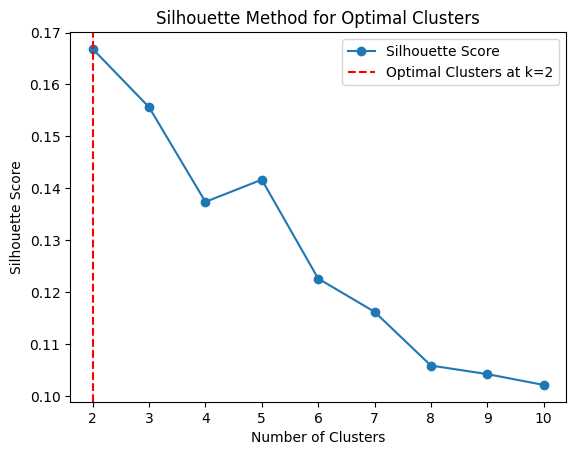

Optimal number of clusters: 2


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# 예제 데이터 생성 (본인 데이터로 대체 가능)
# X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# 클러스터 개수에 따른 실루엣 스코어 저장
silhouette_scores = []

# 클러스터 개수를 2부터 10까지 설정 (실루엣 스코어는 최소 2개의 클러스터가 필요)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(df2_array)
    score = silhouette_score(df2_array, kmeans.labels_)
    silhouette_scores.append(score)

# 최적의 클러스터 개수 찾기
optimal_clusters = np.argmax(silhouette_scores) + 2  # 클러스터 2부터 시작했기 때문에 +2

# 실루엣 스코어 플롯 생성
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')

# 최적의 클러스터 개수를 그래프에 표시
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label='Optimal Clusters at k={}'.format(optimal_clusters))
plt.title('Silhouette Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# 최적의 클러스터 개수 프린트
print(f"Optimal number of clusters: {optimal_clusters}")


In [35]:
# 엘보우 기법과 실루엣 기법 중 어느 것을 활용해야 할까

# 우선 클러스터링을 하는 목적을 생각하자

# 1. 데이터의 응집도-엘보우 기법
# 클러스터 내부의 데이터가 얼마나 유사한지에 초점을 맞춘다
# 동일한 그룹 내 데이터가 가까운 거리에 있을수록 좋다
# 예를 들어 고객 세분화, 품질 관리 등

# 2. 클러스터 간의 분리도-실루엣 기법
# 각 클러스터가 얼마나 명확하게 구분되는지가 중요
# 군집 간의 경계가 명확할수록 좋다
# 예를 들어 종양 분류, 이미지 분류 등

# 왜 고객 세분화는 데이터의 응집도 항목에 해당하는가

# 고객들의 행동 패턴을 분석해 유사한 행동을 보이는 고객 그룹을 찾고
# 그에 맞춰 알맞은 마케팅을 제공해야 한다
# 각 클러스터 내의 고객들이 유사한 행동을 보일수록
# 해당 클러스터에 맞는 적합한 마케팅을 할 수 있다

# 즉 한 클러스터 내 고객들이 얼마나 유사한 행동을 하는지가 중요

# 최종 결정: 엘보우 기법

# k means clustering

In [36]:
churn_array = np.array(df2['churn'])
churn_array

array([1., 0., 1., ..., 1., 1., 0.])

In [37]:
df2_array

array([[-0.32622142, -0.40223691,  0.43906723, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44003595, -1.14178755,  0.51751361, ...,  0.        ,
         0.        ,  0.        ],
       [-1.53679418,  0.46424409, -0.45091299, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.60498839,  0.03236848, -0.56153204, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25683526, -1.37628019, -0.40968371, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.46377078,  1.23786222, -0.11873178, ...,  0.        ,
         1.        ,  0.        ]])

Cluster Labels:
[3 3 2 ... 0 0 1]

Cluster Centers:
[[-4.25179617e-01 -8.37580482e-01  4.49664283e-01  1.83430872e-01
   1.59565712e-02  7.08079732e-03]
 [ 1.16404824e+00 -3.66829357e-01 -1.87258296e-01 -9.26529555e-01
  -6.02782448e-02 -8.41186567e-03]
 [-4.04076125e-01  1.82399842e-01 -9.93768581e-01  1.50672841e-01
   1.50484767e-02 -7.34681192e-04]
 [-3.47941223e-01  1.25431823e+00  8.70412681e-01 -3.27959058e-01
   6.42990311e-03  3.55957980e-03]
 [ 2.31232619e+00  5.93521303e-01  4.02953652e-01  2.40872677e+00
  -4.04955546e-03 -2.39207188e-02]]
Average Silhouette Score: 0.14042656875827886


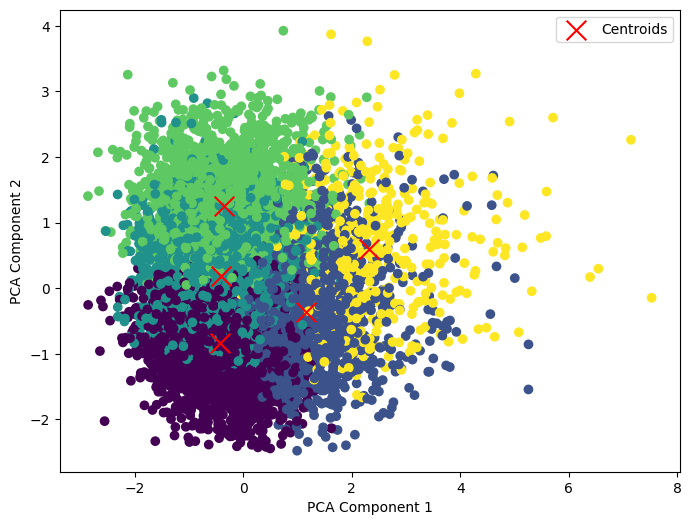

In [38]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# PCA를 사용하여 차원 축소 (예: 2차원으로 축소)
pca = PCA(n_components=6)
reduced_data = pca.fit_transform(df2_array)

# k-평균 클러스터링
k = 5  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
kmeans.fit(reduced_data)

# 클러스터 레이블과 중심 좌표
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 결과 출력
print("Cluster Labels:")
print(labels)
print("\nCluster Centers:")
print(centers)

# 실루엣 점수 계산
silhouette_avg = silhouette_score(df2_array, labels)
print("Average Silhouette Score:", silhouette_avg)

# 클러스터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# plt.title('K-Means Clustering with PCA Reduction')
plt.legend()
plt.show()


In [39]:
# k-평균 클러스터링
k=6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(reduced_data)

# 클러스터 레이블과 중심 좌표
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 실루엣 점수 계산
silhouette_avg = silhouette_score(df2_array, labels)
print(f'Average Silhouette Score:{k}  {silhouette_avg}')
# 2  0.1650398912495829
# 3  0.15021190669793008
# 4  0.1374596839743634
# 5  0.14042901202727615
# 6  0.12141442852567096

Average Silhouette Score:6  0.12197038605448977


In [40]:
# 실루엣 점수를 1에 가깝게 하기 위해 수행한 것들
# 우선 엘보우 기법이 찾은 최적의 클러스터 개수는 5개

# 데이터 표준화
# pca를 통한 차원 축소
# 클러스터 중심점 초기화 (기본적으로 n_init=10으로 설정되어 있음)

# gmm 클러스터링

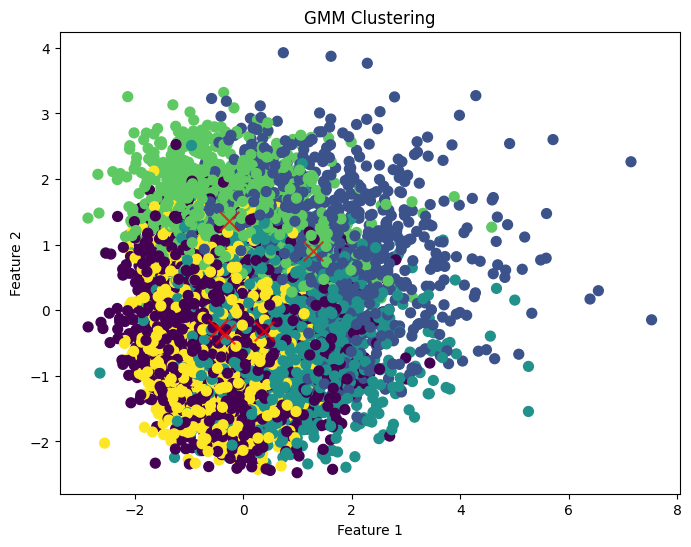

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# 데이터 생성 (예제 데이터)
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# GMM 클러스터링
n_clusters = 5  # 클러스터 개수 설정
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(reduced_data)
labels = gmm.predict(reduced_data)

# 클러스터의 중심점
centers = gmm.means_

# 데이터와 클러스터의 중심점 시각화
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')  # 중심점 표시
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [42]:
X

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,-0.326221,-0.402237,0.439067,0.511633,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.440036,-1.141788,0.517514,0.726664,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.536794,0.464244,-0.450913,-0.705735,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.501521,-0.201650,1.239547,-0.534073,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.063884,-0.342349,0.514829,0.083927,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,-1.391939,-1.511880,-0.952871,0.518374,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.604988,0.032368,-0.561532,-0.626813,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,1.256835,-1.376280,-0.409684,-0.543083,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df2_array

array([[-0.32622142, -0.40223691,  0.43906723, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44003595, -1.14178755,  0.51751361, ...,  0.        ,
         0.        ,  0.        ],
       [-1.53679418,  0.46424409, -0.45091299, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.60498839,  0.03236848, -0.56153204, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25683526, -1.37628019, -0.40968371, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.46377078,  1.23786222, -0.11873178, ...,  0.        ,
         1.        ,  0.        ]])

# 부적합 모델-단순 선형 회귀

In [44]:
pca_df_1 = pca_df['principal 1']
pca_df_1

0      -0.081152
1      -0.612193
2      -0.001868
3       0.708717
4       0.058692
          ...   
9995   -0.300257
9996   -1.760475
9997   -0.287707
9998   -1.328276
9999    0.971909
Name: principal 1, Length: 10000, dtype: float64

In [45]:
pca_df_l_array = np.array(pca_df_1)
pca_df_l_array

array([-0.08115212, -0.61219324, -0.00186794, ..., -0.28770742,
       -1.32827557,  0.97190865])

In [46]:
pca_df_l_array = pca_df_l_array.reshape(-1,1)

In [47]:
pca_df_l_array.shape

(10000, 1)

In [48]:
df2_array_churn = np.array(df2['churn'])
df2_array_churn

array([1., 0., 1., ..., 1., 1., 0.])

In [49]:
df2_array_churn.shape

(10000,)

In [50]:
X=pca_df_l_array
y=df2_array_churn

In [51]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

# 이진 분류를 위한 기준 값
threshold = np.mean(y)

# 모델 정의
model = SGDRegressor(max_iter=1, warm_start=True, penalty=None)

# 학습
epochs = 100
for epoch in range(epochs):
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # 손실 함수 계산 (Mean Squared Error)
    mse = mean_squared_error(y, y_pred)
    
    # 이진 분류를 위한 예측 값 변환
    y_pred_binary = np.where(y_pred > threshold, 1, 0)
    y_true_binary = np.where(y > threshold, 1, 0)
    
    # 정확도 계산
    accuracy = accuracy_score(y_true_binary, y_pred_binary)
    
    print(f"Epoch {epoch+1}/{epochs} - MSE: {mse:.4f} - Accuracy: {accuracy:.4f}")

# 최종 모델 파라미터 출력
print(f"Final coefficients: {model.coef_}")
print(f"Final intercept: {model.intercept_}")


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Epoch 1/100 - MSE: 0.1588 - Accuracy: 0.5122
Epoch 2/100 - MSE: 0.1590 - Accuracy: 0.4947
Epoch 3/100 - MSE: 0.1588 - Accuracy: 0.5800
Epoch 4/100 - MSE: 0.1587 - Accuracy: 0.4855
Epoch 5/100 - MSE: 0.1588 - Accuracy: 0.4738
Epoch 6/100 - MSE: 0.1590 - Accuracy: 0.4636
Epoch 7/100 - MSE: 0.1587 - Accuracy: 0.5519
Epoch 8/100 - MSE: 0.1589 - Accuracy: 0.4681
Epoch 9/100 - MSE: 0.1588 - Accuracy: 0.5097
Epoch 10/100 - MSE: 0.1588 - Accuracy: 0.4942
Epoch 11/100 - MSE: 0.1587 - Accuracy: 0.4955
Epoch 12/100 - MSE: 0.1588 - Accuracy: 0.4799
Epoch 13/100 - MSE: 0.1588 - Accuracy: 0.5467
Epoch 14/100 - MSE: 0.1588 - Accuracy: 0.4745
Epoch 15/100 - MSE: 0.1591 - Accuracy: 0.5915
Epoch 16/100 - MSE: 0.1587 - Accuracy: 0.5393
Epoch 17/100 - MSE: 0.1587 - Accuracy: 0.5295
Epoch 18/100 - MSE: 0.1589 - Accuracy: 0.5712
Epoch 19/100 - MSE: 0.1587 - Accuracy: 0.5172
Epoch 20/100 - MSE: 0.1588 - Accuracy: 0.5132
Epoch 21/100 - MSE: 0.1588 - Accuracy: 0.4931
Epoch 22/100 - MSE: 0.1587 - Accuracy: 0.51

c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Epoch 27/100 - MSE: 0.1587 - Accuracy: 0.5308
Epoch 28/100 - MSE: 0.1587 - Accuracy: 0.5282
Epoch 29/100 - MSE: 0.1587 - Accuracy: 0.5007
Epoch 30/100 - MSE: 0.1587 - Accuracy: 0.5516
Epoch 31/100 - MSE: 0.1588 - Accuracy: 0.4739
Epoch 32/100 - MSE: 0.1587 - Accuracy: 0.5523
Epoch 33/100 - MSE: 0.1587 - Accuracy: 0.5002
Epoch 34/100 - MSE: 0.1587 - Accuracy: 0.5530
Epoch 35/100 - MSE: 0.1588 - Accuracy: 0.5217
Epoch 36/100 - MSE: 0.1588 - Accuracy: 0.5846
Epoch 37/100 - MSE: 0.1588 - Accuracy: 0.5401
Epoch 38/100 - MSE: 0.1589 - Accuracy: 0.5103
Epoch 39/100 - MSE: 0.1589 - Accuracy: 0.4788
Epoch 40/100 - MSE: 0.1588 - Accuracy: 0.5517
Epoch 41/100 - MSE: 0.1587 - Accuracy: 0.4890
Epoch 42/100 - MSE: 0.1587 - Accuracy: 0.5463
Epoch 43/100 - MSE: 0.1587 - Accuracy: 0.5141
Epoch 44/100 - MSE: 0.1587 - Accuracy: 0.4941
Epoch 45/100 - MSE: 0.1587 - Accuracy: 0.5585
Epoch 46/100 - MSE: 0.1589 - Accuracy: 0.5019
Epoch 47/100 - MSE: 0.1587 - Accuracy: 0.5236
Epoch 48/100 - MSE: 0.1597 - Accur

c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Epoch 70/100 - MSE: 0.1589 - Accuracy: 0.4600
Epoch 71/100 - MSE: 0.1587 - Accuracy: 0.4974
Epoch 72/100 - MSE: 0.1588 - Accuracy: 0.5237
Epoch 73/100 - MSE: 0.1589 - Accuracy: 0.4673
Epoch 74/100 - MSE: 0.1589 - Accuracy: 0.5620
Epoch 75/100 - MSE: 0.1588 - Accuracy: 0.5628
Epoch 76/100 - MSE: 0.1587 - Accuracy: 0.5091
Epoch 77/100 - MSE: 0.1588 - Accuracy: 0.5577
Epoch 78/100 - MSE: 0.1591 - Accuracy: 0.6224
Epoch 79/100 - MSE: 0.1587 - Accuracy: 0.4916
Epoch 80/100 - MSE: 0.1591 - Accuracy: 0.6321
Epoch 81/100 - MSE: 0.1587 - Accuracy: 0.5103
Epoch 82/100 - MSE: 0.1588 - Accuracy: 0.5743
Epoch 83/100 - MSE: 0.1587 - Accuracy: 0.5620
Epoch 84/100 - MSE: 0.1588 - Accuracy: 0.5574
Epoch 85/100 - MSE: 0.1587 - Accuracy: 0.5031
Epoch 86/100 - MSE: 0.1588 - Accuracy: 0.4762
Epoch 87/100 - MSE: 0.1593 - Accuracy: 0.4429
Epoch 88/100 - MSE: 0.1591 - Accuracy: 0.4442
Epoch 89/100 - MSE: 0.1592 - Accuracy: 0.6430
Epoch 90/100 - MSE: 0.1587 - Accuracy: 0.4951
Epoch 91/100 - MSE: 0.1587 - Accur

c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Epoch 93/100 - MSE: 0.1588 - Accuracy: 0.5206
Epoch 94/100 - MSE: 0.1587 - Accuracy: 0.4919
Epoch 95/100 - MSE: 0.1589 - Accuracy: 0.4584
Epoch 96/100 - MSE: 0.1588 - Accuracy: 0.4645
Epoch 97/100 - MSE: 0.1589 - Accuracy: 0.4558
Epoch 98/100 - MSE: 0.1590 - Accuracy: 0.6144
Epoch 99/100 - MSE: 0.1590 - Accuracy: 0.5194
Epoch 100/100 - MSE: 0.1592 - Accuracy: 0.4938
Final coefficients: [-0.07662583]
Final intercept: [0.20981715]


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

# 부적합 모델-다중 선형 회귀 모델

In [52]:
pca_df

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6
0,-0.081152,0.714698,0.111165,0.511516,0.620504,0.250174
1,-0.612193,1.034555,0.228446,0.993473,-0.566902,0.786106
2,-0.001868,0.225956,-1.739145,-0.414447,0.543115,-0.440954
3,0.708717,-0.490695,0.242860,1.120250,0.624937,-0.463350
4,0.058692,-0.990903,1.844525,0.639159,-0.581803,0.739728
...,...,...,...,...,...,...
9995,-0.300257,-1.169865,0.694020,-0.093036,0.626421,-0.238671
9996,-1.760475,1.175212,-0.819321,0.081631,0.675815,0.500717
9997,-0.287707,-0.960169,0.081031,-0.292959,0.620921,0.218612
9998,-1.328276,-1.046260,0.837419,0.730312,-0.581993,-0.908688


In [53]:
df2['churn']

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: churn, Length: 10000, dtype: float64

In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(pca_df, df2['churn'], test_size=0.2, random_state=42)

# 모델 정의
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# 예측 결과와 실제 값을 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


Mean Squared Error: 0.1396
Coefficients: [-0.05577889  0.04342398  0.01835552  0.06503962 -0.06639847 -0.1714757 ]
Intercept: 0.20559821748399298
      Actual  Predicted
6252     0.0   0.359054
4684     0.0   0.194633
1731     0.0   0.263027
4742     0.0   0.390283
4521     0.0   0.012170


In [72]:
# EDA 수행 당시-독립 변수와 종속 변수 사이에 선형 관계가 없었다
# 고로 선형 회귀는 통하지 않는다

# 모델-랜덤 포레스트

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
warnings.filterwarnings('ignore')

In [57]:
import pandas as pd
df=pd.read_csv('./원핫인코딩.csv')
df

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,619,2853.325952,39946.563333,101348.880,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,608,2044.094146,41903.930000,112542.580,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502,3801.447619,17740.088889,37977.190,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,699,3072.812564,59919.845000,46913.315,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,850,2918.856279,41836.940000,79084.100,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,3072.812564,19973.281667,48135.320,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,516,1639.131714,5215.419091,101699.770,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,709,3328.880278,14979.961250,42085.580,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772,1787.507381,18768.827500,46444.260,0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df3 = df.drop('churn',axis=1)
df3

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,619,2853.325952,39946.563333,101348.880,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,608,2044.094146,41903.930000,112542.580,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502,3801.447619,17740.088889,37977.190,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,699,3072.812564,59919.845000,46913.315,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,850,2918.856279,41836.940000,79084.100,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,3072.812564,19973.281667,48135.320,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,516,1639.131714,5215.419091,101699.770,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,709,3328.880278,14979.961250,42085.580,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772,1787.507381,18768.827500,46444.260,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df['churn']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [60]:
x = df3
y = df['churn']

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [62]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier( n_estimators=100,criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,)
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = classifier.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 83.05


# 모델-xgbclassifier

In [64]:
xgb=XGBClassifier(n_estimators=480, learning_rate=0.2, max_depth=8)

In [65]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=480, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
xgb_y_pred=xgb.predict(x_test)

In [67]:
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 83.05


# 모델-의사결정트리

In [70]:
x = df3
y = df['churn']

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import pandas as pd

# # 이진 분류용 데이터셋 생성
# X, y = make_classification(n_samples=1000,    # 샘플 수
#                            n_features=10,     # 특성(독립 변수) 수
#                            n_informative=5,   # 유의미한 특성 수
#                            n_redundant=2,     # 중복된 특성 수
#                            n_classes=2,       # 클래스 수 (이진 분류)
#                            random_state=42)

# # 생성한 데이터를 DataFrame으로 변환
# X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])  # 10개의 독립 변수
# y = pd.Series(y)  # 종속 변수 (이진 분류 레이블)

X = df3
y = df['churn']

# 학습용 데이터와 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정트리 모델 초기화
clf = DecisionTreeClassifier(random_state=42)

# 모델 학습
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 모델 성능 평가 (정확도)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7510


In [73]:
# 정확도-70 후반 80 초반
# 나쁘지는 않지만 좋은 것도 아니다
# 아무래도 종속 변수의 불균형이 영향을 미치는 듯 하다

# 종속 변수에서 소수 클래스에 가중치를 부여해서 균형을 맞춘다